In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/contact2/Contacts.xlsx
/kaggle/input/contacts/Contacts.csv
/kaggle/input/remera/Contacts.xlsx


In [4]:
df1 = pd.read_excel('/kaggle/input/contact2/Contacts.xlsx')
df2 = pd.read_csv('/kaggle/input/contacts/Contacts.csv')
df3 = pd.read_excel('/kaggle/input/remera/Contacts.xlsx')

df1.head()



,Name,Location,Number,Sentiment
0,Eugene,Gikondo,781275548,1
1,Emmy,Gikondo,790041035,1
2,Whitney,Remera,791653301,1
3,Nelson,Gikondo,786631257,1
4,Darcy,Gatenga,782721607,1


In [5]:
df2.head()

,Name,Location,Number,Sentiment
0,Joel,Karama,786659669,1
1,Dusabe,Karama,798858655,1
2,Obed,Karama,788393113,1
3,Yvonne,Karama,791705620,1
4,Monique,Karama,738337240,0


In [6]:
df3.head()

,Name,Location,Number,Sentiment
0,Eugene,Gikondo,781275548,1
1,Emmy,Gikondo,790041035,1
2,Whitney,Remera,791653301,1
3,Nelson,Gikondo,786631257,1
4,Darcy,Gatenga,782721607,1


In [7]:
# 📌 Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📂 Load datasets
df1 = pd.read_excel('/kaggle/input/contact2/Contacts.xlsx')
df2 = pd.read_csv('/kaggle/input/contacts/Contacts.csv')
df3 = pd.read_excel('/kaggle/input/remera/Contacts.xlsx')

# 🔗 Combine datasets
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# 🧹 Clean: Drop duplicates and rows with missing Location or Sentiment
df_all.drop_duplicates(inplace=True)
df_all.dropna(subset=['Location', 'Sentiment'], inplace=True)

# ✅ Standardize sentiment
df_all['Sentiment'] = df_all['Sentiment'].astype(int)
df_all['Sentiment_Label'] = df_all['Sentiment'].map({1: 'Positive', 0: 'Negative'})

# 👁 Preview
print(f"Dataset shape: {df_all.shape}")
df_all.head()


Dataset shape: (365, 5)


,Name,Location,Number,Sentiment,Sentiment_Label
0,Asuma,Nyamirambo,728680045,1,Positive
1,Abdoul,Nyamirambo,788221508,1,Positive
2,Adelina,Nyamirambo,787487893,1,Positive
3,Adorfe,Nyamirambo,781979001,1,Positive
4,Bosco,Nyamirambo,784742459,1,Positive


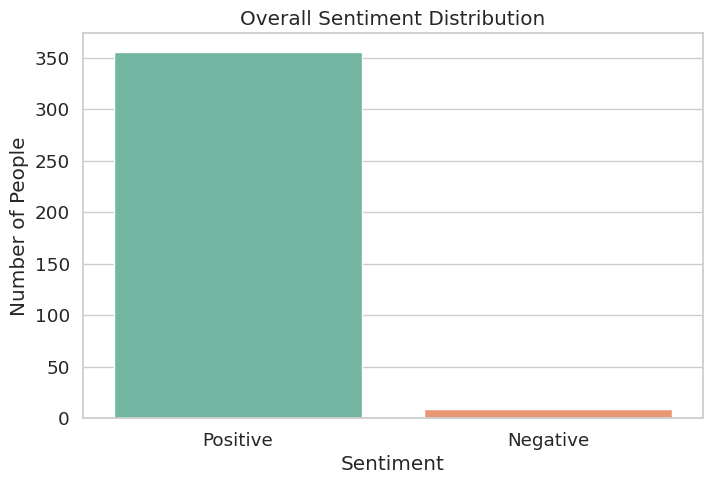

In [8]:
# 🎯 Sentiment bar plot
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.figure(figsize=(8, 5))

sns.countplot(data=df_all, x='Sentiment_Label', palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of People')
plt.show()


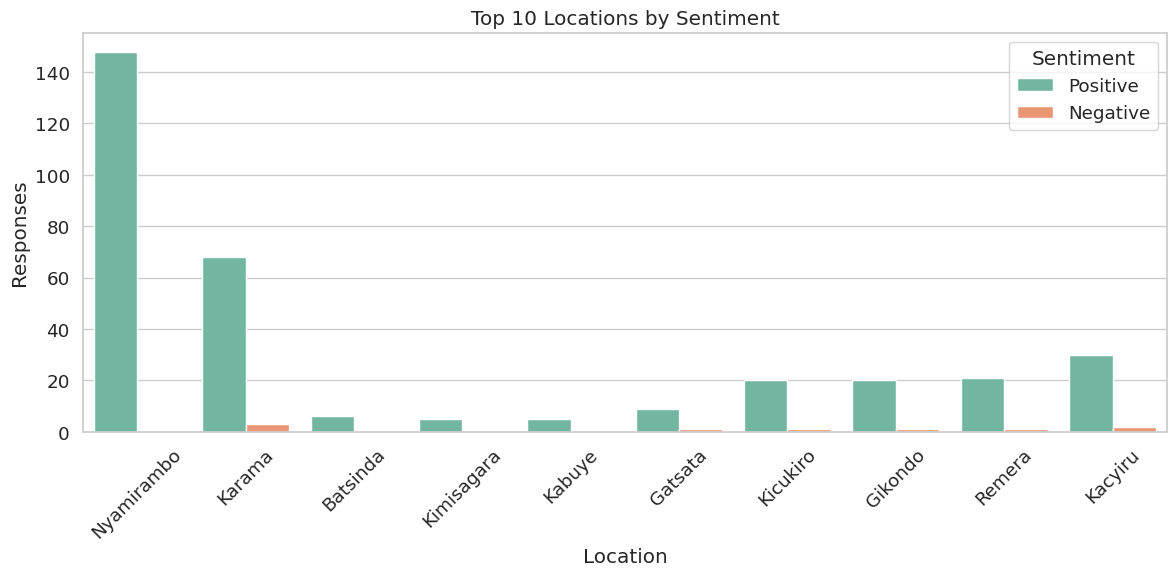

In [9]:
# 📌 Top 10 Locations by record count
top_locs = df_all['Location'].value_counts().nlargest(10).index
filtered_df = df_all[df_all['Location'].isin(top_locs)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Location', hue='Sentiment_Label', palette='Set2')
plt.title('Top 10 Locations by Sentiment')
plt.xlabel('Location')
plt.ylabel('Responses')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


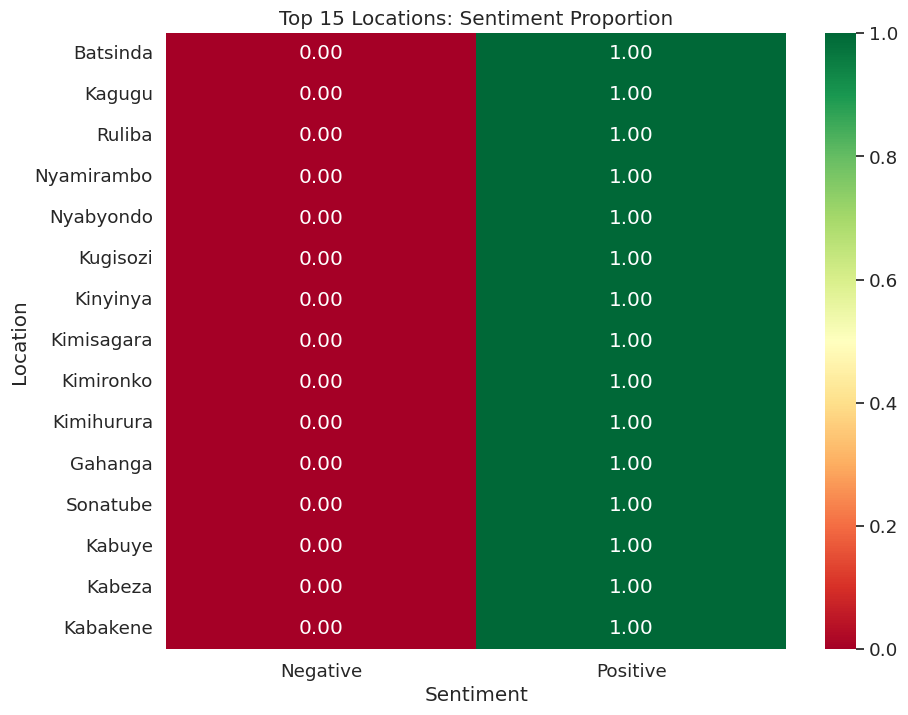

In [10]:
# 📊 Sentiment proportions per location
sentiment_ratio = (
    df_all.groupby('Location')['Sentiment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .rename(columns={0: 'Negative', 1: 'Positive'})
    .sort_values(by='Positive', ascending=False)
)

plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_ratio.head(15), annot=True, cmap="RdYlGn", fmt=".2f")
plt.title('Top 15 Locations: Sentiment Proportion')
plt.ylabel('Location')
plt.xlabel('Sentiment')
plt.show()
